In [1]:
import torch
import pandas as pd
import numpy as np
from collections import OrderedDict
from PIL import Image
from utils import plot_preds_my, plot_preds_knn
from utils import get_sport_dataloader, fit, transform_test
from model import SportsClassification, get_PCA, get_KNN

In [2]:
# Read the data list
class_file_name = '../dataset/sport_dataset/class_dict.csv'
csv_class_data = pd.read_csv(class_file_name)
class_dict = OrderedDict()
for index, row in csv_class_data.iterrows():
    class_dict[row['class']] = row['class_index']

In [3]:
# PCA Dimension Reduction(about need 3 minutes)
PCA = get_PCA(1)
filename = '../dataset/sport_dataset/sports.csv'
csv_img_data = pd.read_csv(filename)
choice = csv_img_data['data set'] == 'train'
csv_train_data = csv_img_data[choice]
X = np.zeros([len(csv_train_data), 224])
y = - np.ones([len(csv_train_data), 1])
for index, row in csv_train_data.iterrows():
    img_path = '../dataset/sport_dataset/' + row['filepaths']
    img = np.asarray(Image.open(img_path).convert('L')) / 255.0
    features = PCA.fit_transform(img)
    label = class_dict[row['labels']]
    X[index] = features.transpose(1,0)
    y[index] = label

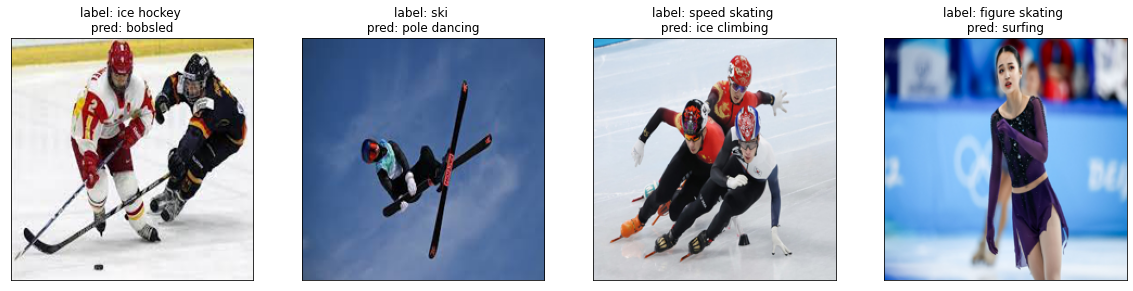

In [5]:
# Use the reduced data to fit the KNN model, and predict.
KNN = get_KNN('mine', 5)
KNN.fit(X, y)
choice = csv_img_data['data set'] == 'test'
csv_test_data = csv_img_data[choice]
path = ['./image/ice hockey.jpg', './image/ski.jpg', './image/speed skating.jpg', './image/figure skating.jpg']
plot_preds_knn(path, class_dict, PCA, KNN)

In [ ]:
# Train the CNN model(about need 2.5 hours on GeForce GTX 1650)
train_loader, val_loader, test_loader, classes = get_sport_dataloader(batch_size=32)
class_number = 100
model=SportsClassification(class_number).cuda()
# model.load_state_dict(torch.load("resnet50_model.pth"))
history=[]
epoch=30
lr=0.001
weight_decay=1e-4
grad_clip=0.1
opt=torch.optim.Adam
history=fit(model,epoch,lr,train_loader,val_loader,weight_decay,grad_clip,opt)
torch.save(model.state_dict(),"resnet50_model.pth")

13572 500 500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


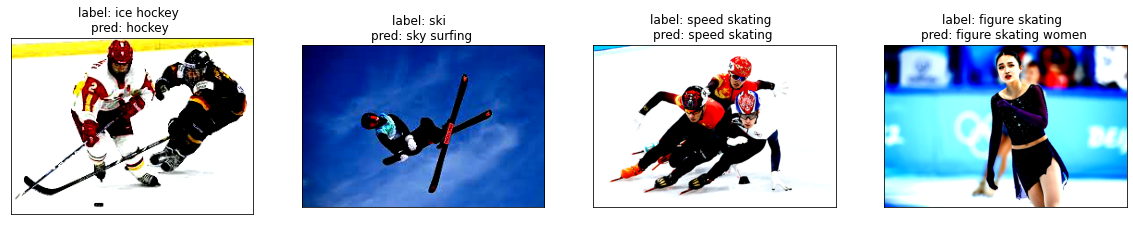

In [5]:
# Use the saved model to predict
class_number = 100
_, _, _, classes = get_sport_dataloader(batch_size=32)
model=SportsClassification(class_number).cuda()
model.eval()
path = ['./image/ice hockey.jpg', './image/ski.jpg', './image/speed skating.jpg', './image/figure skating.jpg']
model.load_state_dict(torch.load("resnet50_model.pth"))
img1 = transform_test(Image.open(path[0]))
img2 = transform_test(Image.open(path[1]))
img3 = transform_test(Image.open(path[2]))
img4 = transform_test(Image.open(path[3]))
imgs= [img1, img2, img3, img4]
plot_preds_my(model, imgs, classes, path)